# WeightWatcher

https://calculationconsulting.com

In [ ]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## 1. Quick start example

### 1.1 Import your model (Keras or PyTorch)

In [1]:
from keras.models import load_model
from keras.applications import vgg16

kmodel = vgg16.VGG16
model = kmodel(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


### 1.2 Run WeightWatcher

- keep_evals = True,  the results dict include the eigenvalues for more detailed analysis

- But the pandas dataframe details does not

- default does NOT compute alphas...too slow for testing

In [2]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze()

2019-07-12 09:00:31,026 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 09:00:31,027 INFO Analyzing model 'vgg16' with 23 layers
2019-07-12 09:00:32,307 INFO ### Printing results ###
2019-07-12 09:00:33,559 INFO Norm: min: 2.4488985538482666, max: 23.428979873657227, avg: 4.01861572265625
2019-07-12 09:00:33,560 INFO Norm compound: min: 2.728064775466919, max: 23.428979873657227, avg: 6.7535719871521
2019-07-12 09:00:33,560 INFO LogNorm: min: 0.3889707922935486, max: 1.369753360748291, avg: 0.5674788951873779
2019-07-12 09:00:33,561 INFO LogNorm compound: min: 0.43449220061302185, max: 1.369753360748291, avg: 0.6947276592254639


In [3]:
results

{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0x103fe60f0>,
  'message': 'Skipping (Layer not supported)'},
 1: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  0: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': ' Layer 2 Weight matrix 1/9 (3,64): Skipping: too small (<50)'},
  1: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': ' Layer 2 Weight matrix 2/9 (3,64): Skipping: too small (<50)'},
  2: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': ' Layer 2 Weight matrix 3/9 (3,64): Skipping: too small (<50)'},
  3: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': ' Layer 2 Weight matrix 4/9 (3,64): Skipping: too small (<50)'},
  4: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': ' Layer 2 Weight matrix 5/9 (3,64): Skipping: too small (<50)'},
  5: {'N': 64,
   'M': 3,
   'Q': 21.333333333333332,
   'summary': ' Layer 2 Weight matrix 6/9 (3,64): Skipping: too small (<50)'},
  6: {'N': 64,
   'M': 3,
   'Q':

In [4]:
watcher.get_summary()

{'norm': 4.0186157,
 'norm_compound': 6.753572,
 'lognorm': 0.5674789,
 'lognorm_compound': 0.69472766}

In [5]:
watcher.print_results()

2019-07-12 09:01:12,491 INFO ### Printing results ###
2019-07-12 09:01:13,771 INFO Norm: min: 2.4488985538482666, max: 23.428979873657227, avg: 4.01861572265625
2019-07-12 09:01:13,772 INFO Norm compound: min: 2.728064775466919, max: 23.428979873657227, avg: 6.7535719871521
2019-07-12 09:01:13,772 INFO LogNorm: min: 0.3889707922935486, max: 1.369753360748291, avg: 0.5674788951873779
2019-07-12 09:01:13,773 INFO LogNorm compound: min: 0.43449220061302185, max: 1.369753360748291, avg: 0.6947276592254639


In [6]:
watcher.get_details()

2019-07-12 09:01:13,788 INFO ### Printing results ###
2019-07-12 09:01:15,017 INFO Norm: min: 2.4488985538482666, max: 23.428979873657227, avg: 4.01861572265625
2019-07-12 09:01:15,018 INFO Norm compound: min: 2.728064775466919, max: 23.428979873657227, avg: 6.7535719871521
2019-07-12 09:01:15,018 INFO LogNorm: min: 0.3889707922935486, max: 1.369753360748291, avg: 0.5674788951873779
2019-07-12 09:01:15,019 INFO LogNorm compound: min: 0.43449220061302185, max: 1.369753360748291, avg: 0.6947276592254639


,layer_type,N,M,slice,slice_count,level,comment,norm,lognorm
layer_id,,,,,,,,,
0,NaN,0,0,NaN,0,LEVEL.LAYER,Layer level,NaN,NaN
1,CONV2D,64,3,0,NaN,LEVEL.SLICE,Slice level,NaN,NaN
1,CONV2D,64,3,1,NaN,LEVEL.SLICE,Slice level,NaN,NaN
1,CONV2D,64,3,2,NaN,LEVEL.SLICE,Slice level,NaN,NaN
1,CONV2D,64,3,3,NaN,LEVEL.SLICE,Slice level,NaN,NaN
1,CONV2D,64,3,4,NaN,LEVEL.SLICE,Slice level,NaN,NaN
1,CONV2D,64,3,5,NaN,LEVEL.SLICE,Slice level,NaN,NaN
1,CONV2D,64,3,6,NaN,LEVEL.SLICE,Slice level,NaN,NaN
1,CONV2D,64,3,7,NaN,LEVEL.SLICE,Slice level,NaN,NaN


## 2. Advanced examples

## 2.1 Filter by layer type (CONV1D, CONV2D, DENSE)

In this example we are interested in the DENSE layers only

In [7]:
from keras.applications import vgg16

kmodel = vgg16.VGG16
model = kmodel(weights='imagenet')

import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

watcher.analyze(layers=ww.LAYER_TYPE.DENSE)

2019-07-12 09:01:18,064 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 09:01:18,064 INFO Analyzing model 'vgg16' with 23 layers
2019-07-12 09:01:18,509 INFO ### Printing results ###
2019-07-12 09:01:18,782 INFO Norm: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-07-12 09:01:18,783 INFO Norm compound: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-07-12 09:01:18,784 INFO LogNorm: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009
2019-07-12 09:01:18,785 INFO LogNorm compound: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009


{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0xb39f41588>,
  'message': 'Skipping (Layer not supported)'},
 1: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 2: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 3: {'id': 3,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb39f54f60>,
  'message': 'Skipping (Layer not supported)'},
 4: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 5: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 6: {'id': 6,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb28a24d30>,
  'message': 'Skipping (Layer not supported)'},
 7: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 8: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested

In [8]:
watcher.print_results()

2019-07-12 09:01:24,604 INFO ### Printing results ###
2019-07-12 09:01:24,842 INFO Norm: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-07-12 09:01:24,843 INFO Norm compound: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-07-12 09:01:24,844 INFO LogNorm: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009
2019-07-12 09:01:24,844 INFO LogNorm compound: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009


## 2.2 Filter by multiple layer types

In this example we are interested in the CONV1D and DENSE layers.

Filter the layers using a bitmask.

In [14]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

watcher.analyze(layers=ww.LAYER_TYPE.CONV1D|ww.LAYER_TYPE.DENSE)

2019-07-12 09:28:50,452 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 09:28:50,462 INFO Analyzing model 'vgg16' with 23 layers
2019-07-12 09:29:00,539 INFO ### Printing results ###
2019-07-12 09:29:01,581 INFO Norm: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-07-12 09:29:01,584 INFO Norm compound: min: 16.757492065429688, max: 23.428979873657227, avg: 19.402746200561523
2019-07-12 09:29:01,587 INFO LogNorm: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009
2019-07-12 09:29:01,588 INFO LogNorm compound: min: 1.2242090702056885, max: 1.369753360748291, avg: 1.2832533121109009


{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0xb39f41588>,
  'message': 'Skipping (Layer not supported)'},
 1: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 2: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 3: {'id': 3,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb39f54f60>,
  'message': 'Skipping (Layer not supported)'},
 4: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 5: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 6: {'id': 6,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb28a24d30>,
  'message': 'Skipping (Layer not supported)'},
 7: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested to analyze)'},
 8: {'layer_type': <LAYER_TYPE.CONV2D: 4>,
  'message': 'Skipping (Layer type not requested

## 2.3 Filter by layer Ids

In [10]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

watcher.analyze(layers=[20])

2019-07-12 09:01:31,786 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 09:01:31,787 INFO Analyzing model 'vgg16' with 23 layers
2019-07-12 09:01:32,097 INFO ### Printing results ###
2019-07-12 09:01:32,322 INFO Norm: min: 23.428979873657227, max: 23.428979873657227, avg: 23.428979873657227
2019-07-12 09:01:32,323 INFO Norm compound: min: 23.428979873657227, max: 23.428979873657227, avg: 23.428979873657227
2019-07-12 09:01:32,324 INFO LogNorm: min: 1.369753360748291, max: 1.369753360748291, avg: 1.369753360748291
2019-07-12 09:01:32,324 INFO LogNorm compound: min: 1.369753360748291, max: 1.369753360748291, avg: 1.369753360748291


{0: {'id': 0,
  'type': <keras.engine.input_layer.InputLayer at 0xb39f41588>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 1: {'id': 1,
  'type': <keras.layers.convolutional.Conv2D at 0xb39f3c908>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 2: {'id': 2,
  'type': <keras.layers.convolutional.Conv2D at 0xb39f4a9e8>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 3: {'id': 3,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb39f54f60>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 4: {'id': 4,
  'type': <keras.layers.convolutional.Conv2D at 0xb39f54c50>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 5: {'id': 5,
  'type': <keras.layers.convolutional.Conv2D at 0xb39f91ac8>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 6: {'id': 6,
  'type': <keras.layers.pooling.MaxPooling2D at 0xb28a24d30>,
  'message': 'Skipping (Layer id not requested to analyze)'},
 7: {'id': 7,
  'type': <keras.l

## 2.4 Get the return values per layer

In [11]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze()

2019-07-12 09:01:33,708 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 09:01:33,709 INFO Analyzing model 'vgg16' with 23 layers
2019-07-12 09:01:34,181 INFO ### Printing results ###
2019-07-12 09:01:35,422 INFO Norm: min: 2.4488985538482666, max: 23.428979873657227, avg: 4.01861572265625
2019-07-12 09:01:35,422 INFO Norm compound: min: 2.728064775466919, max: 23.428979873657227, avg: 6.7535719871521
2019-07-12 09:01:35,423 INFO LogNorm: min: 0.3889707922935486, max: 1.369753360748291, avg: 0.5674788951873779
2019-07-12 09:01:35,424 INFO LogNorm compound: min: 0.43449220061302185, max: 1.369753360748291, avg: 0.6947276592254639


In [12]:
for layer_id, result in results.items():
    for slice_id, summary in result.items():
        if not str(slice_id).isdigit() or "lognorm" not in summary:
            continue
        lognorm = summary["lognorm"]
        print("Layer {}, Slice {}: Lognorm: {}".format(layer_id, slice_id, lognorm))    

Layer 2, Slice 0: Lognorm: 0.3978934586048126
Layer 2, Slice 1: Lognorm: 0.45358702540397644
Layer 2, Slice 2: Lognorm: 0.40578144788742065
Layer 2, Slice 3: Lognorm: 0.45428669452667236
Layer 2, Slice 4: Lognorm: 0.49695152044296265
Layer 2, Slice 5: Lognorm: 0.45737624168395996
Layer 2, Slice 6: Lognorm: 0.4044671952724457
Layer 2, Slice 7: Lognorm: 0.4511153995990753
Layer 2, Slice 8: Lognorm: 0.3889707922935486
Layer 4, Slice 0: Lognorm: 0.44109997153282166
Layer 4, Slice 1: Lognorm: 0.4613628089427948
Layer 4, Slice 2: Lognorm: 0.4370166063308716
Layer 4, Slice 3: Lognorm: 0.4667660593986511
Layer 4, Slice 4: Lognorm: 0.5201410055160522
Layer 4, Slice 5: Lognorm: 0.46935534477233887
Layer 4, Slice 6: Lognorm: 0.4464665651321411
Layer 4, Slice 7: Lognorm: 0.48161619901657104
Layer 4, Slice 8: Lognorm: 0.4471622705459595
Layer 5, Slice 0: Lognorm: 0.45507872104644775
Layer 5, Slice 1: Lognorm: 0.4839082956314087
Layer 5, Slice 2: Lognorm: 0.4593982994556427
Layer 5, Slice 3: Lognorm

## 2.5 Power Law Fit

In [16]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

2019-07-12 09:41:14,434 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 09:41:14,436 INFO Analyzing model 'vgg16' with 23 layers
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packag

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

## 2.6 Debug and Custom Logging

### Custom Logging at Debug Level

In [17]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

import weightwatcher as ww

watcher = ww.WeightWatcher(model=model, logger=logger)

results = watcher.analyze()

INFO:__main__:
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:__main__:Analyzing model 'vgg16' with 23 layers
DEBUG:__main__:Layer 1: <keras.engine.input_layer.InputLayer object at 0xb39f41588>
DEBUG:__main__:Layer 1: Skipping (Layer not supported)
DEBUG:__main__:Layer 2: <keras.layers.convolutional.Conv2D object at 0xb39f3c908>
DEBUG:__main__:Keras tensor shape detected: 3x64 (NxM), 3x3 (i,j)
DEBUG:__main__:Layer 2: Analyzing 9 weight matrices...
DEBUG:__main__:     Layer 2 Weight matrix 1/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:     Layer 2 Weight matrix 2/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:     Layer 2 Weight matrix 3/9 (3,64): Skipping: too small (<50)
DEBUG:__main__:     Layer 2 Weight matrix

DEBUG:__main__:    Layer 9 Weight matrix 1/9 (256,256): Lognorm: 0.4611811339855194
DEBUG:__main__: Layer 9  Weight matrix 2/9 (256,256): Analyzing ...
DEBUG:__main__:    Layer 9 Weight matrix 2/9 (256,256): Lognorm: 0.5103281140327454
DEBUG:__main__: Layer 9  Weight matrix 3/9 (256,256): Analyzing ...
DEBUG:__main__:    Layer 9 Weight matrix 3/9 (256,256): Lognorm: 0.46348103880882263
DEBUG:__main__: Layer 9  Weight matrix 4/9 (256,256): Analyzing ...
DEBUG:__main__:    Layer 9 Weight matrix 4/9 (256,256): Lognorm: 0.5043201446533203
DEBUG:__main__: Layer 9  Weight matrix 5/9 (256,256): Analyzing ...
DEBUG:__main__:    Layer 9 Weight matrix 5/9 (256,256): Lognorm: 0.5939016342163086
DEBUG:__main__: Layer 9  Weight matrix 6/9 (256,256): Analyzing ...
DEBUG:__main__:    Layer 9 Weight matrix 6/9 (256,256): Lognorm: 0.5075631737709045
DEBUG:__main__: Layer 9  Weight matrix 7/9 (256,256): Analyzing ...
DEBUG:__main__:    Layer 9 Weight matrix 7/9 (256,256): Lognorm: 0.45727992057800293
DE

DEBUG:__main__:    Layer 16 Weight matrix 1/9 (512,512): Lognorm: 0.6414387226104736
DEBUG:__main__: Layer 16  Weight matrix 2/9 (512,512): Analyzing ...
DEBUG:__main__:    Layer 16 Weight matrix 2/9 (512,512): Lognorm: 0.658482551574707
DEBUG:__main__: Layer 16  Weight matrix 3/9 (512,512): Analyzing ...
DEBUG:__main__:    Layer 16 Weight matrix 3/9 (512,512): Lognorm: 0.6415495276451111
DEBUG:__main__: Layer 16  Weight matrix 4/9 (512,512): Analyzing ...
DEBUG:__main__:    Layer 16 Weight matrix 4/9 (512,512): Lognorm: 0.6379082798957825
DEBUG:__main__: Layer 16  Weight matrix 5/9 (512,512): Analyzing ...
DEBUG:__main__:    Layer 16 Weight matrix 5/9 (512,512): Lognorm: 0.6930620670318604
DEBUG:__main__: Layer 16  Weight matrix 6/9 (512,512): Analyzing ...
DEBUG:__main__:    Layer 16 Weight matrix 6/9 (512,512): Lognorm: 0.6355615258216858
DEBUG:__main__: Layer 16  Weight matrix 7/9 (512,512): Analyzing ...
DEBUG:__main__:    Layer 16 Weight matrix 7/9 (512,512): Lognorm: 0.637979626

### Disable Logging

In [19]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model, log=False)

results = watcher.analyze()

## 3. pyTorch Models

In [20]:
data = []

In [21]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg16(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg16torch", "summary": watcher.get_summary()})

2019-07-12 09:53:07,101 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 09:53:07,105 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

2019-07-12 09:58:28,007 INFO LogNorm compound: min: 0.5506355166435242, max: 1.7093772888183594, avg: 0.9792784452438354
INFO:weightwatcher.weightwatcher:LogNorm compound: min: 0.5506355166435242, max: 1.7093772888183594, avg: 0.9792784452438354
2019-07-12 09:58:28,008 INFO Alpha: min: 1.525053187957775, max: 4.343339437091599, avg: 2.89233801062374
INFO:weightwatcher.weightwatcher:Alpha: min: 1.525053187957775, max: 4.343339437091599, avg: 2.89233801062374
2019-07-12 09:58:28,010 INFO Alpha compound: min: 1.7535254182659035, max: 3.8419123407107967, avg: 2.767717801865902
INFO:weightwatcher.weightwatcher:Alpha compound: min: 1.7535254182659035, max: 3.8419123407107967, avg: 2.767717801865902
2019-07-12 09:58:28,011 INFO Alpha Weighted: min: 0.35369982858727583, max: 3.7137959804872724, avg: 1.405072984118814
INFO:weightwatcher.weightwatcher:Alpha Weighted: min: 0.35369982858727583, max: 3.7137959804872724, avg: 1.405072984118814
2019-07-12 09:58:28,012 INFO Alpha Weighted compound: mi

In [22]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg16_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg16bntorch", "summary": watcher.get_summary()})

2019-07-12 10:27:38,029 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 10:27:38,034 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

2019-07-12 10:32:30,172 INFO LogNorm compound: min: 0.3503240942955017, max: 1.6797541379928589, avg: 0.9220765233039856
INFO:weightwatcher.weightwatcher:LogNorm compound: min: 0.3503240942955017, max: 1.6797541379928589, avg: 0.9220765233039856
2019-07-12 10:32:30,173 INFO Alpha: min: 1.5416896884676328, max: 5.67734879325649, avg: 3.099085407095711
INFO:weightwatcher.weightwatcher:Alpha: min: 1.5416896884676328, max: 5.67734879325649, avg: 3.099085407095711
2019-07-12 10:32:30,175 INFO Alpha compound: min: 1.6648925749775423, max: 4.570109325217148, avg: 2.966024122982959
INFO:weightwatcher.weightwatcher:Alpha compound: min: 1.6648925749775423, max: 4.570109325217148, avg: 2.966024122982959
2019-07-12 10:32:30,176 INFO Alpha Weighted: min: -0.14159670551181727, max: 5.226979652357834, avg: 1.0820403179586902
INFO:weightwatcher.weightwatcher:Alpha Weighted: min: -0.14159670551181727, max: 5.226979652357834, avg: 1.0820403179586902
2019-07-12 10:32:30,177 INFO Alpha Weighted compound: 

In [23]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg11(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg11torch", "summary": watcher.get_summary()})

2019-07-12 10:32:33,130 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 10:32:33,132 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

INFO:weightwatcher.weightwatcher:Norm compound: min: 5.895910263061523, max: 57.39590072631836, avg: 19.885963439941406
2019-07-12 10:37:40,622 INFO LogNorm: min: 0.7200042009353638, max: 1.758880853652954, avg: 0.9474983215332031
INFO:weightwatcher.weightwatcher:LogNorm: min: 0.7200042009353638, max: 1.758880853652954, avg: 0.9474983215332031
2019-07-12 10:37:40,623 INFO LogNorm compound: min: 0.7691774368286133, max: 1.758880853652954, avg: 1.1386475563049316
INFO:weightwatcher.weightwatcher:LogNorm compound: min: 0.7691774368286133, max: 1.758880853652954, avg: 1.1386475563049316
2019-07-12 10:37:40,625 INFO Alpha: min: 1.3854856636971848, max: 3.875876983334032, avg: 2.5724933311485363
INFO:weightwatcher.weightwatcher:Alpha: min: 1.3854856636971848, max: 3.875876983334032, avg: 2.5724933311485363
2019-07-12 10:37:40,626 INFO Alpha compound: min: 1.522580930995347, max: 3.5210144189935715, avg: 2.5370047984035393
INFO:weightwatcher.weightwatcher:Alpha compound: min: 1.52258093099534

In [24]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg11_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg11bntorch", "summary": watcher.get_summary()})

2019-07-12 10:37:42,447 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 10:37:42,448 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

INFO:weightwatcher.weightwatcher:Norm compound: min: 4.532721519470215, max: 53.424800872802734, avg: 19.01651382446289
2019-07-12 10:41:51,260 INFO LogNorm: min: 0.5993328094482422, max: 1.7277429103851318, avg: 0.8902592658996582
INFO:weightwatcher.weightwatcher:LogNorm: min: 0.5993328094482422, max: 1.7277429103851318, avg: 0.8902592658996582
2019-07-12 10:41:51,261 INFO LogNorm compound: min: 0.6529925465583801, max: 1.7277429103851318, avg: 1.0959337949752808
INFO:weightwatcher.weightwatcher:LogNorm compound: min: 0.6529925465583801, max: 1.7277429103851318, avg: 1.0959337949752808
2019-07-12 10:41:51,263 INFO Alpha: min: 1.3312675711718847, max: 5.229885854374285, avg: 2.7469664048443074
INFO:weightwatcher.weightwatcher:Alpha: min: 1.3312675711718847, max: 5.229885854374285, avg: 2.7469664048443074
2019-07-12 10:41:51,264 INFO Alpha compound: min: 1.66424651984324, max: 3.9272856564161924, avg: 2.638103821130217
INFO:weightwatcher.weightwatcher:Alpha compound: min: 1.664246519843

In [25]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg13(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg13torch", "summary": watcher.get_summary()})

2019-07-12 10:41:53,132 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 10:41:53,133 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

In [26]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg13_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg13bntorch", "summary": watcher.get_summary()})

2019-07-12 10:46:18,612 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 10:46:18,618 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

In [27]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg19(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg19torch", "summary": watcher.get_summary()})

2019-07-12 10:50:42,870 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 10:50:42,872 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
2019-07-12 10:55:52,652 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-07-12 10:55:54,335 INFO Norm: min: 3.2178001403808594, max: 47.974002838134766, avg: 7.2684478759765625
INFO:weightwatcher.weightwatcher:Norm: min: 3.2178001403808594, max: 47.974002838134766, avg: 7.2684478759765625
2019-07-12 10:55:54,336 INFO Norm compound: min: 3.559237241744995, max: 47.974002838134766, avg: 12.337833404541016
INFO:weightwatcher.weightwatcher:Norm compound: min: 3.559237241744995, max: 47.974002838134766, avg: 12.337833404541016
2019-07-12 10:55:54,337 INFO LogNorm: min: 0.507559061050415, max: 1.68

In [28]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg19_bn(pretrained=True)

watcher = ww.WeightWatcher(model=model)

results = watcher.analyze(compute_alphas=True)

data.append({"name": "vgg19bntorch", "summary": watcher.get_summary()})

2019-07-12 10:55:57,800 INFO 
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:
WeightWatcher v0.1.3 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-07-12 10:55:57,801 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value 

/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
2019-07-12 11:01:11,170 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-07-12 11:01:12,966 INFO Norm: min: 1.6498754024505615, max: 45.86455154418945, avg: 6.413882255554199
INFO:weightwatcher.weightwatcher:Norm: min: 1.6498754024505615, max: 45.86455154418945, avg: 6.413882255554199
2019-07-12 11:01:12,967 INFO Norm compound: min: 1.9919495582580566, max: 45.86455154418945, avg: 11.5429048538208
INFO:weightwatcher.weightwatcher:Norm compound: min: 1.9919495582580566, max: 45.86455154418945, avg: 11.5429048538208
2019-07-12 11:01:12,968 INFO LogNorm: min: 0.21745115518569946, max: 1.66147720

In [29]:
data

[{'name': 'vgg16torch',
  'summary': {'norm': 7.8014417,
   'norm_compound': 14.097927,
   'lognorm': 0.8381871,
   'lognorm_compound': 0.97927845,
   'alpha': 2.89233801062374,
   'alpha_compound': 2.767717801865902,
   'alpha_weighted': 1.405072984118814,
   'alpha_weighted_compound': 1.7930749068678844}},
 {'name': 'vgg16bntorch',
  'summary': {'norm': 6.997469,
   'norm_compound': 13.280408,
   'lognorm': 0.7700977,
   'lognorm_compound': 0.9220765,
   'alpha': 3.099085407095711,
   'alpha_compound': 2.966024122982959,
   'alpha_weighted': 1.0820403179586902,
   'alpha_weighted_compound': 1.5490586351060547}},
 {'name': 'vgg11torch',
  'summary': {'norm': 10.107157,
   'norm_compound': 19.885963,
   'lognorm': 0.9474983,
   'lognorm_compound': 1.1386476,
   'alpha': 2.5724933311485363,
   'alpha_compound': 2.5370047984035393,
   'alpha_weighted': 1.8439950665352716,
   'alpha_weighted_compound': 2.4581932538546676}},
 {'name': 'vgg11bntorch',
  'summary': {'norm': 9.151532,
   'nor

In [30]:
# pytorch Model accuracies 
# https://github.com/Cadene/pretrained-models.pytorch

accuracies = {
    "vgg11torch": 68.970,
    "vgg11bntorch": 70.452,
    "vgg13torch": 69.662,
    "vgg13bntorch": 71.508,
    "vgg16torch": 71.636,
    "vgg16bntorch": 73.518,
    "vgg19torch": 72.080,
    "vgg19bntorch": 74.266,
}

In [31]:
# pytorch Model accuracies 
# https://github.com/Cadene/pretrained-models.pytorch

accuracies5 = {
    "vgg11torch": 88.746,
    "vgg11bntorch": 89.818,
    "vgg13torch": 89.264,
    "vgg13bntorch": 90.494,
    "vgg16torch": 90.354,
    "vgg16bntorch": 91.608,
    "vgg19torch": 90.822,
    "vgg19bntorch": 92.066,
}

### 3.1 Log Norm of Weight Matrices vs Accuracies of models

The following graph demonstrates the linear relationship between the average Log Norm of Weight matrices and the test accuracies of the models (notice we didnt't need the test data):

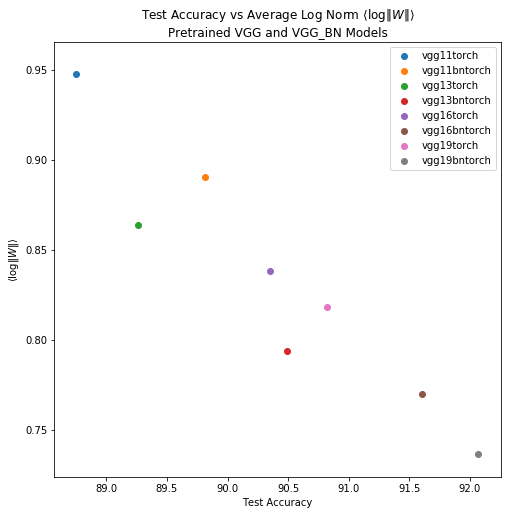

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

for modelname, accuracy in accuracies5.items():
    x = accuracy
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y = summary[0]["lognorm"]
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Average Log Norm $\langle\log\Vert W\Vert\rangle$"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"$\langle\log\Vert W\Vert\rangle$");

Let's compare the average Log Norm with the average Log Norm compound:

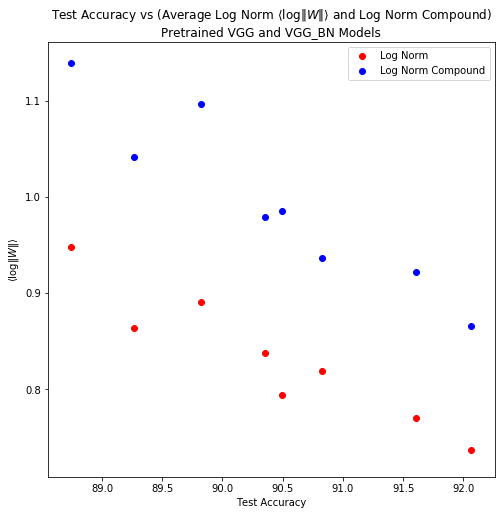

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

x = []
y1, y2 = [], []
for modelname, accuracy in accuracies5.items():
    x.append(accuracy)
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y1.append(summary[0]["lognorm"])
    y2.append(summary[0]["lognorm_compound"])
    label = modelname
plt.scatter(x,y1,label="Log Norm", color='r')
plt.scatter(x,y2,label="Log Norm Compound", color='b')

plt.legend()
plt.title(r"Test Accuracy vs (Average Log Norm $\langle\log\Vert W\Vert\rangle$ and Log Norm Compound)"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"$\langle\log\Vert W\Vert\rangle$");

### 3.2 Power law fitting (Alpha) of Weight Matrices vs Accuracies of models

The linear relationship between the Power law fitting (Alpha) of the weight matrices and the accuracies of the models is demonstrated in the following graph:

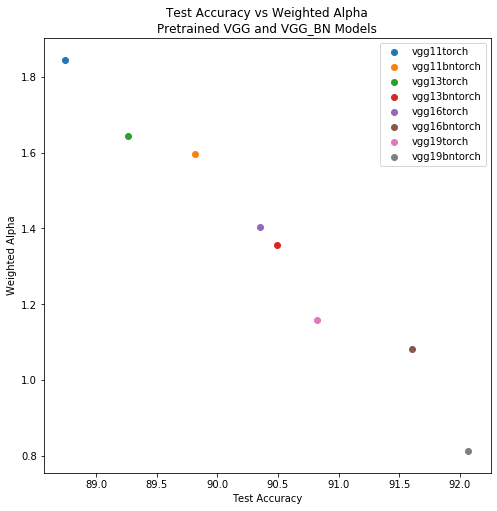

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

for modelname, accuracy in accuracies5.items():
    x = accuracy
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y = summary[0]["alpha_weighted"]
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Weighted Alpha"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Weighted Alpha");

The more accurate the model, the lower the exponent of the power law fit of the weight matrices is.

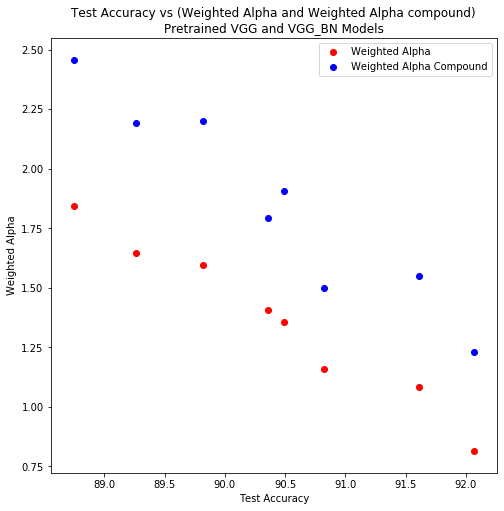

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]

x = []
y1, y2 = [], []
for modelname, accuracy in accuracies5.items():
    x.append(accuracy)
    summary = [d["summary"] for d in data if d["name"] == modelname]
    y1.append(summary[0]["alpha_weighted"])
    y2.append(summary[0]["alpha_weighted_compound"])
plt.scatter(x,y1,label="Weighted Alpha", color='r')
plt.scatter(x,y2,label="Weighted Alpha Compound", color='b')

plt.legend()
plt.title(r"Test Accuracy vs (Weighted Alpha and Weighted Alpha compound)"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Weighted Alpha");

## 4. Conclusion

WeightWatcher helps you choose the best pretrained model for your needs.

You can use WeightWatcher to compare several pretrained models and choose the one with the lowest Log Norm.